### Installing essential libraries

In [1]:
pip install basemap

In [2]:
%pip install basemap-data-hires
%pip install pandas 
%pip install numpy 



Note: you may need to restart the kernel to use updated packages.


### Importing libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
import IPython
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

### Plotting Major Indian Airports

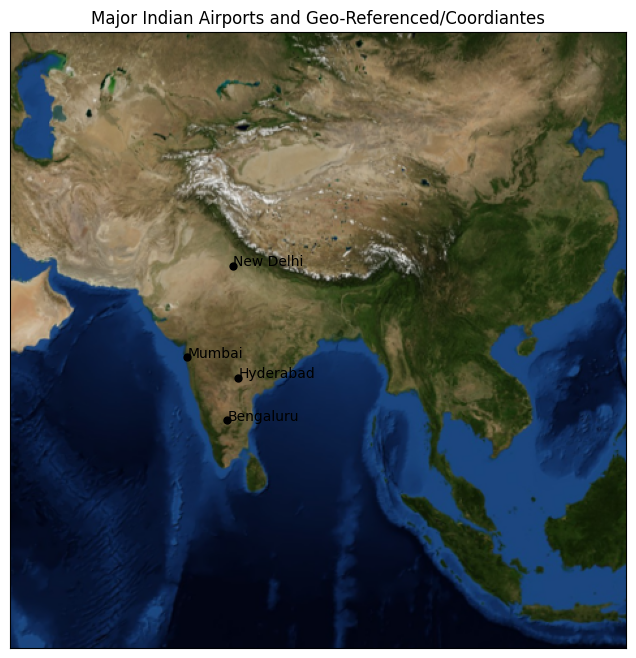

In [4]:
fig = plt.figure(figsize=(8,8), dpi = 100)
m= Basemap(projection='lcc', resolution='h', width=7E6,height=7E6, lat_0 = 21.433, lon_0=87.01 )
m.etopo(scale=0.5, alpha=0.5)
m.bluemarble(scale=0.5)

x1,y1 = m(77.20, 28.70)
plt.plot(x1,y1,'ok', markersize=5)
plt.text(x1,y1,'New Delhi')

x2,y2 = m(72.87, 19.07)
plt.plot(x2,y2,'ok', markersize=5)
plt.text(x2,y2,'Mumbai')

# x3,y3 = m(80.27, 13.08)
# plt.plot(x3,y3,'ok', markersize=5)
# plt.text(x3,y3,'Chennai')

x3,y3 = m(78.48, 17.38)
plt.plot(x3,y3,'ok', markersize=5)
plt.text(x3,y3,'Hyderabad')

x4,y4 = m(77.59, 12.97)
plt.plot(x4,y4,'ok', markersize=5)
plt.text(x4,y4,'Bengaluru')

plt.title('Major Indian Airports and Geo-Referenced/Coordiantes')
plt.savefig('plot.png')
plt.show()

### Visualizing flight path from London to New Delhi

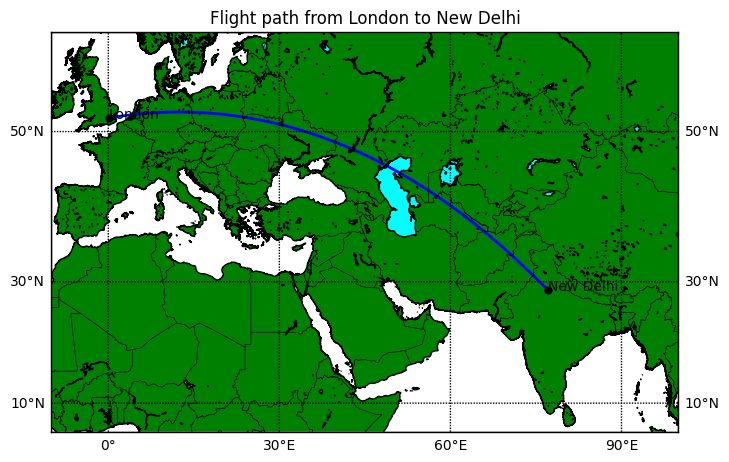

In [5]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-10.,llcrnrlat=5.,urcrnrlon = 100.,urcrnrlat=60.,
            rsphere=(6378137.00, 6356752.31),
            resolution='h',projection='merc',
            lat_0=40.,lon_0=-20,lat_ts=20.0)

ndlat = 28.70; ndlon = 77.10
lonlat = 51.51; lonlon = 0.08

m.drawgreatcircle(ndlon,ndlat, lonlon,lonlat, linewidth=2, color='b')

x, y = m(0.08, 51.51)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'London')

x1, y1 = m(77.10, 28.70)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, 'New Delhi')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.fillcontinents(color='green', lake_color='aqua')
m.drawparallels(np.arange(10,90,20), labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30), labels=[1,1,0,1])

ax.set_title('Flight path from London to New Delhi')
plt.savefig('plot2.png')
plt.show()

### World Day/Night map on Miller Cylindrical projection

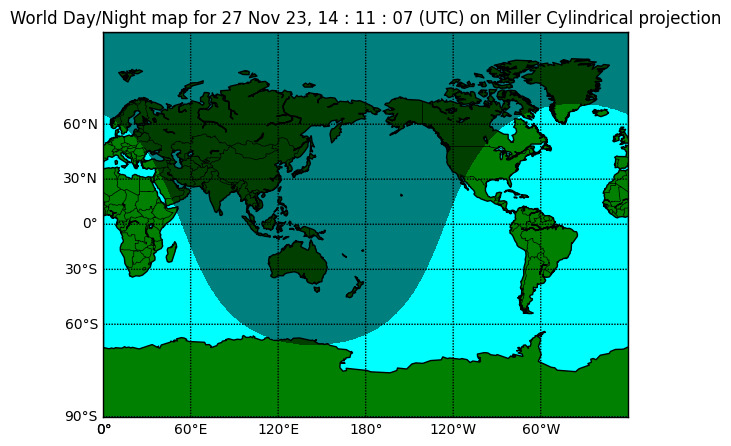

In [15]:
from datetime import datetime
plt.figure(figsize=(10,5), dpi=100)
map = Basemap(projection='mill',lon_0=180)


map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='green', lake_color='aqua')
map.drawparallels(np.arange(-90,90,30), labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60), labels=[0,0,0,1])

date = datetime.utcnow()

cs = map.nightshade(date)


plt.title('World Day/Night map for %s (UTC) on Miller Cylindrical projection'% date.strftime("%d %b %y, %H : %M : %S"))

plt.savefig('plot3.png')

### Animating the flight path from London to New Delhi

C:\Users\Yash\AppData\Local\Temp\ipykernel_3940\973121605.py:43: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  flt_marker.set_data(x_interp[frame], y_interp[frame]);
C:\Users\Yash\AppData\Local\Temp\ipykernel_3940\973121605.py:43: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  flt_marker.set_data(x_interp[frame], y_interp[frame]);


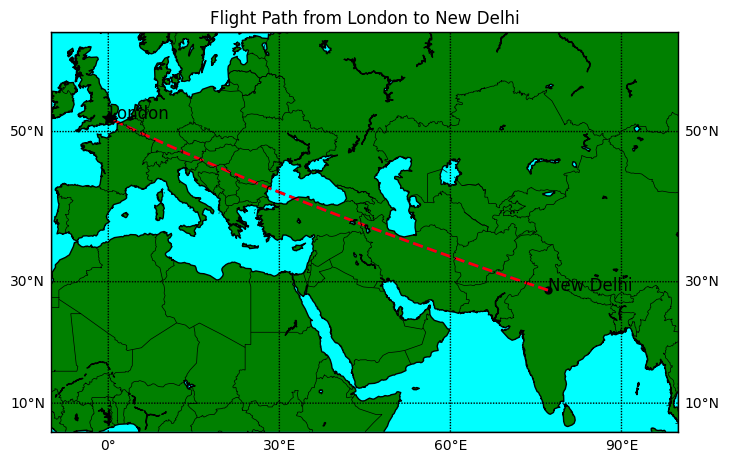

In [7]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = fig.add_axes([0.1,0.1,0.8,0.8])


m = Basemap(llcrnrlon=-10.,llcrnrlat=5.,urcrnrlon = 100.,urcrnrlat=60.,
            rsphere=(6378137.00, 6356752.31),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-20,lat_ts=20.0)

ndlat = 28.70; ndlon = 77.10
lonlat = 51.51; lonlon = 0.08

x, y = m(0.08, 51.51)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'London', fontsize=12)

x1, y1 = m(77.10, 28.70)
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, 'New Delhi', fontsize=12)

num_points = 100

lon_interp = np.linspace(ndlon,lonlon,num_points)
lat_interp = np.linspace(ndlat, lonlat, num_points)

x_interp, y_interp = m(lon_interp, lat_interp)

plt.plot(x_interp, y_interp, 'b--', linewidth=2)

line, = plt.plot([], [], 'r--',linewidth=2)

flt_marker, = plt.plot([], [], 'k*', markersize = 10)


def init():
  line.set_data([], []);
  flt_marker.set_data([], []);
  return line, flt_marker;


def update(frame):
  line.set_data(x_interp[:frame], y_interp[:frame]);
  flt_marker.set_data(x_interp[frame], y_interp[frame]);
  return line, flt_marker;

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='green', lake_color='aqua')



m.drawparallels(np.arange(10,90,20), labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30), labels=[1,1,0,1])

ax.set_title('Flight Path from London to New Delhi')


ani = FuncAnimation(fig, update, frames=num_points, init_func = init,interval = 100, blit=True)

# HTML(ani.to_html5_video())
HTML(ani.to_jshtml())

ani.save('flight animation.gif', writer='pillow', fps=10)

### Visualizing Earth orbital walking path around the sun

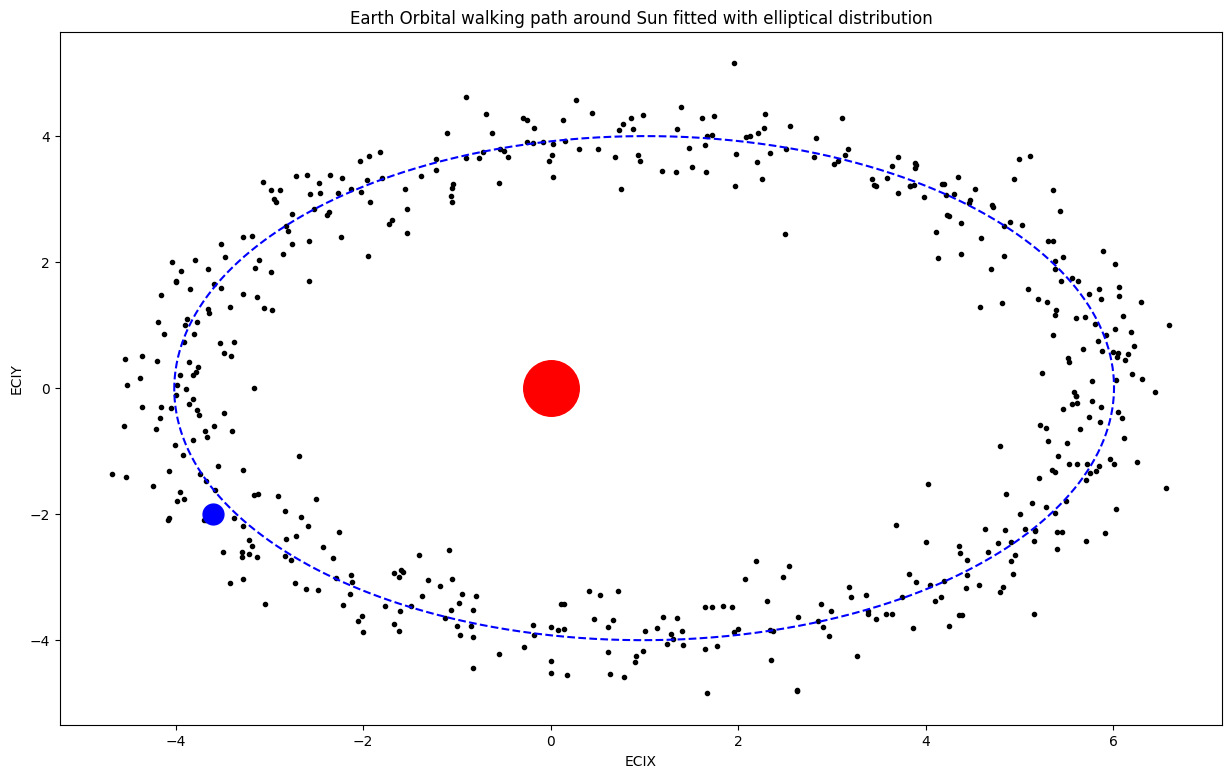

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize =(15,9))

N = 500

t = np.linspace(0,2*np.pi, N)

x = 5*np.cos(t) + 0.4*np.random.normal(size=N) + 1
y = 4*np.sin(t) + 0.4*np.random.normal(size=N)

plt.plot(x,y,'.k')

xmean, ymean = x.mean(), y.mean()
x -= xmean
y -= ymean

U,S,V = np.linalg.svd(np.stack((x,y)))

tt = np.linspace(0, 2*np.pi, 1000)
circle = np.stack((np.cos(tt), np.sin(tt)))
transform = np.sqrt(2/N) * U.dot(np.diag(S))
fit = transform.dot(circle) + np.array([[xmean],[ymean]])
plt.plot(fit[0,:], fit[1,:], '--b')
plt.plot(0,0, 'or', markersize=40)
plt.plot(-3.6,-2, 'ob', markersize=15)

plt.title("Earth Orbital walking path around Sun fitted with elliptical distribution")
plt.xlabel('ECIX')
plt.ylabel('ECIY')

plt.savefig('plot4.png')
plt.show()